# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np


# TODO: Number of training examples
n_train = np.size(y_train)

# print('train data size: {}'.format(np.size(X_train)))

# TODO: Number of validation examples
n_validation = np.size(y_valid)

# TODO: Number of testing examples.
n_test = np.size(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train)[1:]
# print('image_shape: {}'.format(np.shape(X_train)[1:]))

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validataion examples = ", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validataion examples =  4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?


Labels within 20 labels Counts: {1: 1, 4: 2, 5: 1, 7: 1, 8: 2, 9: 1, 10: 3, 12: 2, 13: 1, 14: 1, 16: 1, 20: 1, 35: 2, 40: 1}
First 20 labels: [13, 40, 10, 20, 8, 8, 12, 16, 5, 10, 4, 35, 4, 10, 1, 14, 7, 35, 9, 12]
Example of Image 7:
Image - Min Value: 27 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 16 Name: 7

Labels within 20 labels Counts: {1: 1, 2: 2, 7: 1, 8: 1, 10: 2, 12: 1, 13: 2, 17: 1, 18: 1, 20: 1, 23: 1, 31: 1, 33: 1, 35: 2, 38: 2}
First 20 labels: [8, 13, 23, 2, 12, 2, 10, 1, 35, 38, 33, 18, 35, 10, 31, 13, 38, 20, 7, 17]
Example of Image 7:
Image - Min Value: 27 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: 13


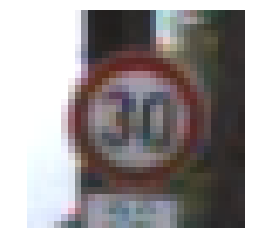

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

### show statics of the previous 100 data
### labels's distribution 
### show one sample 
def stat_data(x, y, n, sample_id = 1):
    print('\nLabels within {} labels Counts: {}'.format(n, dict(zip(*np.unique(y[:n], return_counts=True)))))
    print('First {} labels: {}'.format(n, y[:n]))
    
    sample_image = x[sample_id]
    sample_label = y[sample_id]
    print('Example of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, y[sample_label]))
    plt.axis('off')
    plt.imshow(sample_image)

# stat_data(X_train, y_train, 20, 7)
# stat_data(X_valid, y_valid, 20, 7)
# stat_data(X_test, y_test, 10, 3)

### let's shuffle the data 
def shuffle_data(x, y):
    N = len(y)
    a = list(range(N))
    # print('N = {} a = {}'.format(N, a))
    np.random.shuffle(a)
    xx = [x[i] for i in a]
    yy = [y[i] for i in a]
    return xx, yy
    
X_train_s, y_train_s = shuffle_data(X_train, y_train)
X_valid_s, y_valid_s = shuffle_data(X_valid, y_valid)

stat_data(X_valid_s, y_valid_s, 20, 7)
stat_data(X_train_s, y_train_s, 20, 7)



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [13]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from skimage import color, exposure, transform
IMG_SIZE = 32
NUM_CLASSES = n_classes

def rgb2gray(rgb):

    # gray = [0:rgb.shape()[0],0:rgb.shape()[1], 1]
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    
    return np.reshape(gray, (*np.shape(gray), 1))

def normalize(x):
    nx = list()
    for image in x:
        gray = rgb2gray(image)
        xmin = np.min(gray)
        xmax = np.max(gray)
        norm_img = (gray - xmin)/(xmax - xmin)
        nx.append(norm_img)
    
    return np.array(nx)

def mytransform(img):
    
    # central square crop
    min_side = min(img.shape[:-1])
    
    centre = img.shape[0]//2, img.shape[1]//2
    
    img = img[centre[0] - min_side//2 : centre[0] + min_side//2, 
             centre[1] - min_side//2 : centre[1] + min_side//2]
    
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))
    # cv2.resize(RGB_img, (32, 32), interpolation = cv2.INTER_CUBIC)
    
    # roll color/channel axis to the front axis 0 
    data = np.rollaxis(img, -1, 0)
    
    return data

def preprocess_img(img):
    # transform from rgb to hsv 
    hsv = color.rgb2hsv(img)
    
    # Histogram Equalization for v channel
    hsv[:, :, 2] = exposure.equalize_hist(hsv[:,:,2])
    img = color.hsv2rgb(hsv)
    
    return mytransform(img)

def preprocess_data(x):
    nx = list()
    for img in x:
        nx.append(preprocess_img(img))
    return np.array(nx)

# X_train_norm = normalize(X_train_s)
# X_valid_norm = normalize(X_valid_s)
# X_test_norm = normalize(X_test)
X_train_norm = preprocess_data(X_train_s)
X_valid_norm = preprocess_data(X_valid_s)
X_test_norm = preprocess_data(X_test)

print('X_train_max : {} min: {}'.format(np.max(X_train_norm), np.min(X_train_norm)))
print('X_train_max : {} min: {}'.format(np.max(X_valid_norm), np.min(X_valid_norm)))
print('X_train_max : {} min: {}'.format(np.max(X_test_norm), np.min(X_test_norm)))


def one_hot_encode(y):
    return np.eye(n_classes)[y]

y_train_v = one_hot_encode(y_train_s)
y_valid_v = one_hot_encode(y_valid_s)
y_test_v  = one_hot_encode(y_test)

print('y_train_v.shape = {}'.format(np.shape(y_train_v)))


/home/davidz/work/anaconda2/envs/carnd-terml/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


X_train_max : 1.0 min: 0.0
X_train_max : 1.0 min: 0.0
X_train_max : 1.0 min: 0.0
y_train_v.shape = (34799, 43)


In [14]:
# print('X_train_s.shape: {}'.format(np.shape(X_train_s)))
# print('X_train_norm.shape: {}'.format(np.shape(X_train_norm)))
img = X_train_s[0]
print('img shape: {}'.format(np.shape(img)))
gray = rgb2gray(img)
print('gray shape: {}'.format(np.shape(gray)))

img shape: (32, 32, 3)
gray shape: (32, 32, 1)


In [15]:
# build CNN model 
### try to build the model using Keres

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout, SpatialDropout2D
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import backend as K
K.set_image_data_format('channels_first')

keep_prob = 0.8

def cnn_model():
    # build model
    model = Sequential()
    # Conv Layer1: Input = 3 * 32 * 32, Output = 32 * 32 * 32
    model.add(Conv2D(32, kernel_size=(3, 3), 
                     input_shape=(3, IMG_SIZE, IMG_SIZE), 
                     padding='SAME', activation = 'relu'))

    # MaxPooling 32 * 32 * 32 -> 32 * 16 * 16
    model.add(MaxPooling2D((2,2)))

    # add Spatial Dropout2D
    # model.add(SpatialDropout2D(0.1))
    model.add(Dropout(1-keep_prob))
    
    # add Layer2: cnn, maxpooling, dropout, 32*16*16 -> 64 * 8 * 8
    model.add(Conv2D(64, kernel_size=(3,3), 
                    padding='SAME', activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    # model.add(SpatialDropout2D(0.1))
    model.add(Dropout(1-keep_prob))
    
    # add Layer3: cnn, maxpooling, dropout, 64*8*8 -> 128*4*4
    model.add(Conv2D(128, kernel_size=(3,3), 
                    padding='SAME', activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(1-keep_prob))
    
    # Flatten 
    model.add(Flatten())
    
    # dense 1 
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # dense 2
    # model.add(Dense(100))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.2))

    # logits
    model.add(Dense(NUM_CLASSES))
    model.add(Activation('softmax'))

    return model

In [17]:
# train model
model = cnn_model()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

# Data augmentation 
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center = False,
                             featurewise_std_normalization = False, 
                             width_shift_range = 0.1, 
                             height_shift_range = 0.1, 
                             zoom_range = 0.2, 
                             shear_range = 0.1, 
                             rotation_range = 10.
                            )

datagen.fit(X_train_norm)


In [20]:
# Train the model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
batch_size = 32
epochs = 7
# history = model.fit(X_train_norm, y_train_v, batch_size= 64, epochs= 20)
history = model.fit_generator(datagen.flow(X_train_norm, y_train_v, batch_size = batch_size), 
                    steps_per_epoch = X_train_norm.shape[0],
                    epochs=epochs,
                    validation_data=(X_valid_norm, y_valid_v),
                    callbacks=[ModelCheckpoint('traffic_model.h5', save_best_only=True)]
                    )

Epoch 1/7
34799/34799 [==============================] - 10517s - loss: 0.3530 - acc: 0.8885 - val_loss: 0.1478 - val_acc: 0.9574
Epoch 2/7
 1185/34799 [>.............................] - ETA: 10604s - loss: 0.1851 - acc: 0.9430

KeyboardInterrupt: 

In [21]:
epochs = 1
# history = model.fit(X_train_norm, y_train_v, batch_size= 64, epochs= 20)
history = model.fit_generator(datagen.flow(X_train_norm, y_train_v, batch_size = batch_size), 
                    steps_per_epoch = X_train_norm.shape[0],
                    epochs=epochs,
                    validation_data=(X_valid_norm, y_valid_v),
                    callbacks=[ModelCheckpoint('traffic_model.h5', save_best_only=True)]
                    )

Epoch 1/1
13871/34799 [==========>...................] - ETA: 6385s - loss: 0.1867 - acc: 0.9436

KeyboardInterrupt: 

In [22]:

print('Validation data')
vm = model.evaluate(X_valid_norm, y_valid_v)

for mi in range(len(model.metrics_names)):
    metric_name = model.metrics_names[mi]
    metric_value = vm[mi]
    print('{}:{}'.format(metric_name, metric_value))

print('Test data')
tm = model.evaluate(X_test_norm, y_test_v)

for mi in range(len(model.metrics_names)):
    metric_name = model.metrics_names[mi]
    metric_value = tm[mi]
    print('{}:{}'.format(metric_name, metric_value))


Validation data
4410/4410 [==============================] - 24s    
loss:0.14898921307630397
acc:0.9628117912210304
Test data
12630/12630 [==============================] - 65s    
loss:0.18303520871329645
acc:0.9575613618840891


In [41]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import cv2

def readImg(name):
    img = cv2.imread(name, -1)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.resize(RGB_img, (32, 32), interpolation = cv2.INTER_CUBIC)
    # return img
img_path = []
img_path.append('./GTSRB/Final_Test/Images/01874.ppm')
img_path.append('./GTSRB/Final_Test/Images/01961.ppm')
img_path.append('./GTSRB/Final_Test/Images/01932.ppm')
img_path.append('./GTSRB/Final_Test/Images/01149.ppm')
img_path.append('./GTSRB/Final_Test/Images/00034.ppm')
img_path.append('./GTSRB/Final_Test/Images/00181.ppm')
img_path.append('./GTSRB/Final_Test/Images/00673.ppm')
img_path.append('./GTSRB/Final_Test/Images/00198.ppm')

test_imgs = []

for i in range(len(img_path)):
    test_imgs.append(preprocess_img(readImg(img_path[i])))
    print('img_path[i]: {}'.format(img_path[i]))
# img1 = readImg('./GTSRB/Final_Test/Images/01874.ppm')
# img2 = readImg('./GTSRB/Final_Test/Images/01961.ppm')
# img3 = readImg('./GTSRB/Final_Test/Images/01932.ppm')
# img4 = readImg('./GTSRB/Final_Test/Images/01149.ppm')
# img5 = readImg('./GTSRB/Final_Test/Images/00034.ppm')

# print('img1.shape: {}'.format(np.shape(img1)))

# test_imgs.append(preprocess_img(img1))
# test_imgs.append(preprocess_img(img2))
# test_imgs.append(preprocess_img(img3))
# test_imgs.append(preprocess_img(img4))
# test_imgs.append(preprocess_img(img5))

test_labels = [
    14, # 14, Stop
    20, # 20, Dangerous curve to the right
    1, # 1, Speed limit (30km/h)
    31, # 31, Wild animals crossing
    2, # 2, Speed limit (50km/h)
    4, # 4, Speed limit (70 km/h)
    35, # 35, Ahead alone
    18, # 18 General Caution
]

test_data = np.array(test_imgs, dtype='float32')

y_pred = model.predict_classes(test_data)

t_pred = model.predict(test_data)

print('y_pred {}'.format(y_pred))
# print('t_pred {}'.format(t_pred))
print('test_accuracy: {}'.format(np.sum(y_pred==test_labels)/len(y_pred)))

# print('test_imgs.shape: {}'.format(np.shape(test_imgs)))

# plt.axis('off')
# plt.imshow(img2)
# plt.imshow(img1)

    

/home/davidz/work/anaconda2/envs/carnd-terml/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


img_path[i]: ./GTSRB/Final_Test/Images/01874.ppm
img_path[i]: ./GTSRB/Final_Test/Images/01961.ppm
img_path[i]: ./GTSRB/Final_Test/Images/01932.ppm
img_path[i]: ./GTSRB/Final_Test/Images/01149.ppm
img_path[i]: ./GTSRB/Final_Test/Images/00034.ppm
img_path[i]: ./GTSRB/Final_Test/Images/00181.ppm
img_path[i]: ./GTSRB/Final_Test/Images/00673.ppm
img_path[i]: ./GTSRB/Final_Test/Images/00198.ppm
8/8 [==============================] - 0s
y_pred [14 20  1 31  2  4 35 18]
test_accuracy: 1.0


test_label: 14 pred_indices: [14  0  1  2  3] pred_prob: [ 0.40460968  0.14884758  0.14884758  0.14884758  0.14884758]
test_label: 20 pred_indices: [20 22 23 28  0] pred_prob: [ 0.40364715  0.14944562  0.14896928  0.14896898  0.14896895]
test_label: 1 pred_indices: [1 0 2 3 4] pred_prob: [ 0.40460968  0.14884758  0.14884758  0.14884758  0.14884758]
test_label: 31 pred_indices: [31  0  1  2  3] pred_prob: [ 0.40460968  0.14884758  0.14884758  0.14884758  0.14884758]
test_label: 2 pred_indices: [2 0 1 3 4] pred_prob: [ 0.40460968  0.14884758  0.14884758  0.14884758  0.14884758]
test_label: 4 pred_indices: [4 0 1 2 3] pred_prob: [ 0.40460968  0.14884758  0.14884758  0.14884758  0.14884758]


IndexError: index 5 is out of bounds for axis 0 with size 5

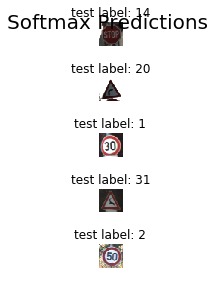

In [42]:
# prediction 
import tensorflow as tf
with tf.Session() as sess:
    top_n_predictions = 5
    loaded_logits = tf.placeholder(tf.float32, [None, n_classes], name='y')
    predictions = sess.run(
        tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions), 
        feed_dict = {loaded_logits: t_pred})
    
    # plot and print   
    fig, axies = plt.subplots(nrows=5, ncols=1)
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize = 20)
    for img_i, (img_f, img_label, pred_indice, pred_prob) in enumerate(zip(img_path, test_labels, predictions.indices, predictions.values)):
        pred_prob = pred_prob/pred_prob.sum()
        print('test_label: {} pred_indices: {} pred_prob: {}'.format(img_label, pred_indice, pred_prob))
        # axies[img_i].imshow(img)
        axies[img_i].imshow(readImg(img_f))
        axies[img_i].set_title('test label: {}'.format(img_label))
        axies[img_i].set_axis_off()

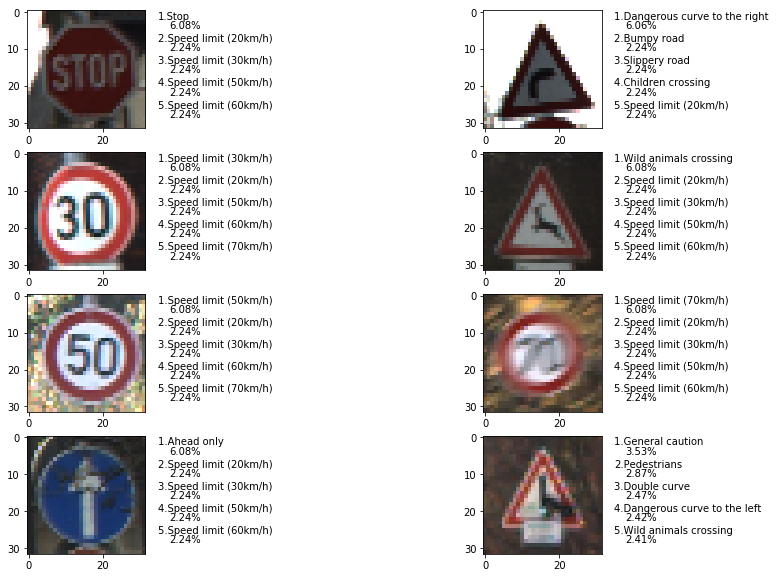

In [44]:
import pandas as pd
machine_answers = t_pred
with tf.Session() as sess:
    top5 = sess.run(tf.nn.top_k(tf.nn.softmax(tf.constant(machine_answers)), 5))
    signnames = pd.read_csv('signnames.csv')
    fig = plt.figure(figsize = (15, 10))
    for i, indices in enumerate(top5.indices):
        fig.add_subplot(4, 2| Stop Sign      		| Stop sign   									| , i+1)
        plt.imshow(readImg(img_path[i]))
        for j, index in enumerate(indices):
            plt.text(35, (j*6)+2, '{}.{}'.format(j+1, signnames['SignName'][index]))
            plt.text(38, (j*6)+4.5, '{:.2%}'.format(top5.values[i][j]))
            

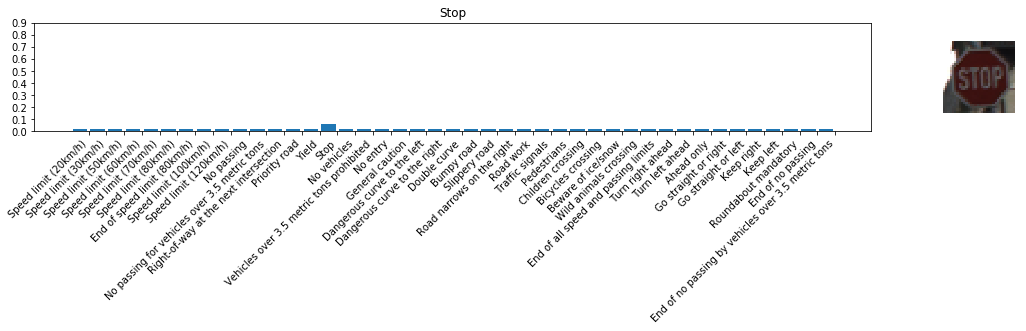

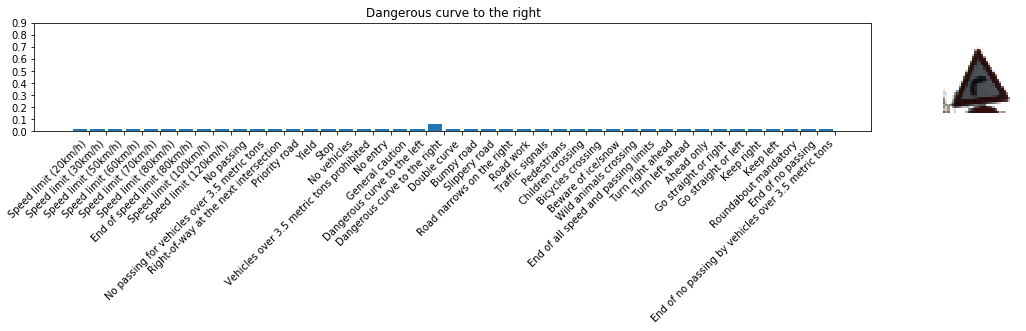

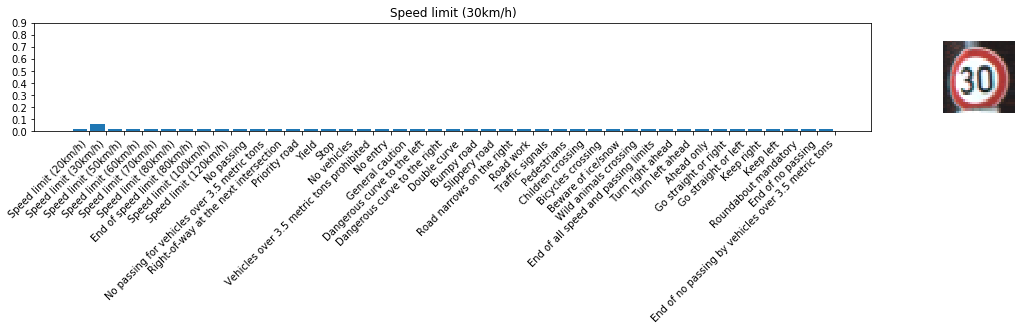

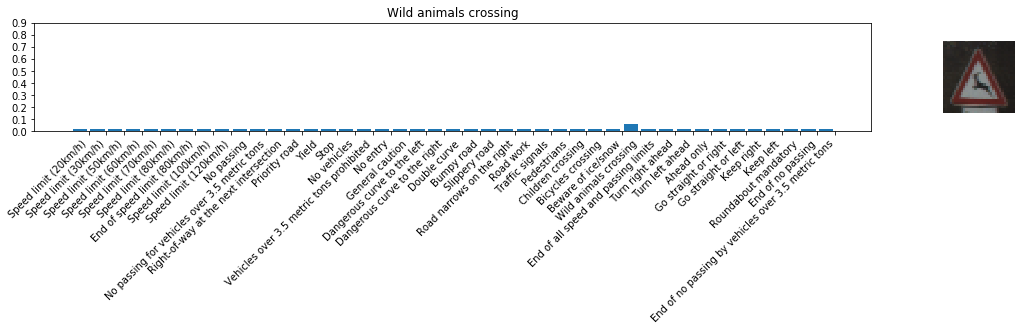

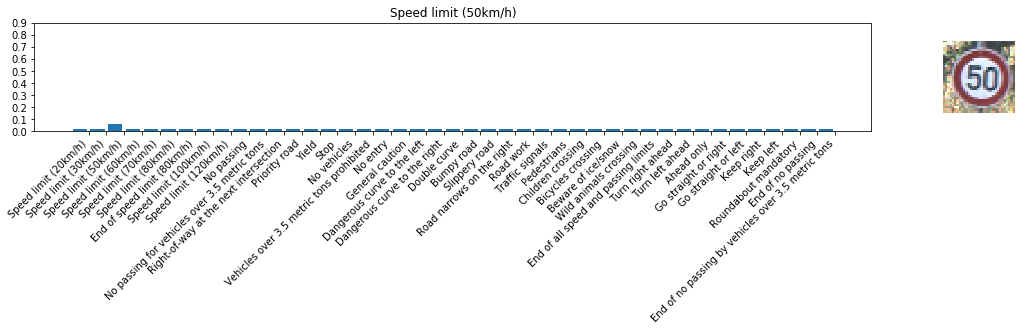

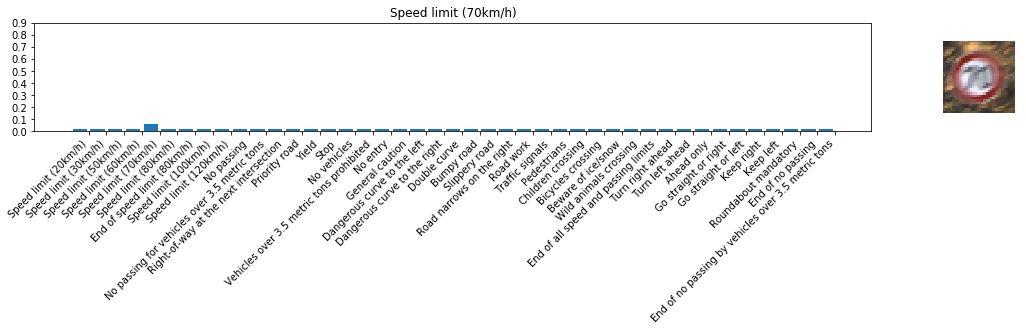

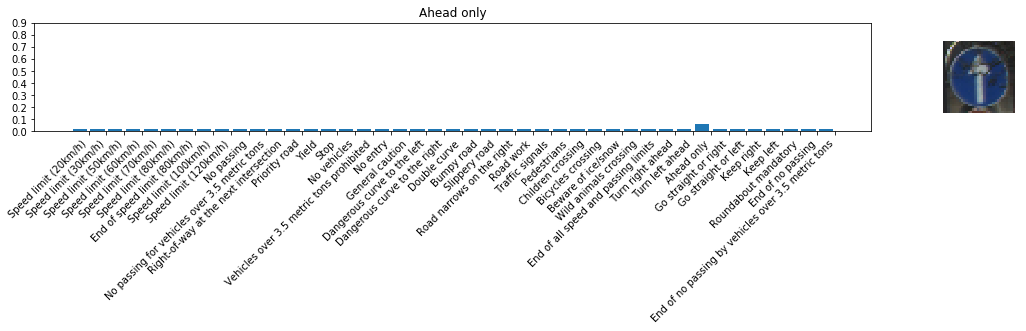

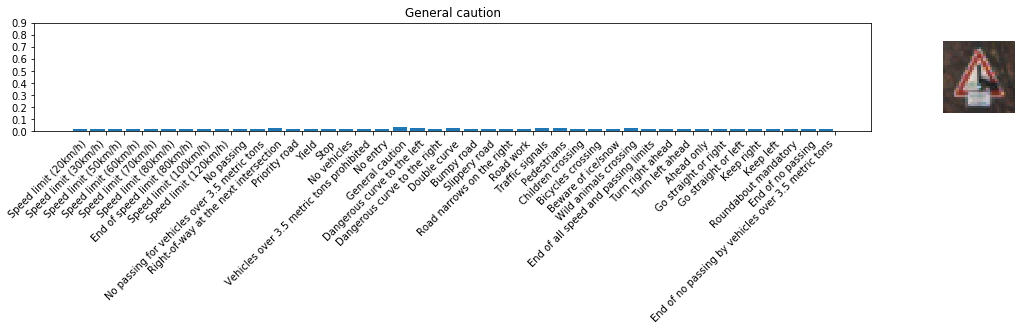

In [45]:
### Visualize the softmax probabilities here
import pandas as pd

machine_answers = t_pred
candidates = y_pred

labels = range(n_classes)
# print('labels: {}'.format(labels))
with tf.Session() as sess:
    topn = sess.run(tf.nn.softmax(tf.constant(machine_answers)))
    signnames = pd.read_csv('signnames.csv')
    SN = signnames['SignName']
    label_names = [SN[i] for i in labels]
    
    
    for i, (probs, candidate) in enumerate(zip(topn, candidates)):
        fig = plt.figure(figsize = (15, 2))
        plt.bar(labels, probs)
        plt.title(signnames['SignName'][test_labels[i]])
        plt.xticks(np.arange(0.5, 43.5, 1.0), label_names, ha='right', rotation = 45)
        plt.yticks(np.arange(0.0, 1.0, 0.1), np.arange(0.0, 1.0, 0.1))
        
        # Change the numbers in this array to position your image [left, bottom, width, height]
        ax = plt.axes([.75, 0.25, 0.5, 0.5], frameon=True)
        ax.imshow(readImg(img_path[i]))
        ax.axis('off')

plt.show()


### Model Architecture

In [7]:
### old code below, can be deleted 

### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

# print('X_train_norm shape: {}'.format(np.shape(X_train_norm)))
    
def LeNet(x, class_num, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    # keep_prob = 0.95

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
  
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1) 

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
  
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
 
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding ='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    # fc0   = flatten(conv2)
    fc0   = tf.reshape(conv2, [-1, 400])
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1   = tf.nn.relu(fc1)

    # DROP OUT
    fc1   = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 200. Output = 100.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 100. Output = class_num.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, class_num), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(class_num))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
# tf.reset_default_graph()

def neural_net_image_input(image_shape):
    input_i = tf.placeholder(tf.float32, [None, *image_shape], name='x')
    return input_i


def neural_net_label_input(n_classes):
    label = tf.placeholder(tf.float32, [None, n_classes], name='y')
    return label

def neural_net_keep_prob_input():
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    return keep_prob


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

def train_neural_network(session, optimizer, feature_batch, label_batch, keep_prob):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x:feature_batch, y:label_batch, keep_prob:keep_prob})

def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    # Calculate batch loss and accuracy
    loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob:1.})
    valid_acc = session.run(accuracy, feed_dict={x: X_valid_norm, y: y_valid_v, keep_prob: 1.})
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                loss,
                valid_acc))
    
save_model_path = './image_classification'

# use batches
def train(epochs, batch_size, learning_rate = 0.0005):
    # Inputs
    x = neural_net_image_input((32, 32, 1))
    y = neural_net_label_input(n_classes)
    keep_prob = neural_net_keep_prob_input()
    
    # x = tf.placeholder(tf.float32, [None, 32, 32, 1], name='x')
    # y = tf.placeholder(tf.float32, [None, n_classes], name='y')
    # keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    
    # Model
    logits = LeNet(x, n_classes, keep_prob)

    # Name logits Tensor, so that is can be loaded from disk after training
    logits = tf.identity(logits, name='logits')

    # Loss and Optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

    # Accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
    
    # Train the network 
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epochs):
            batch_index = 0
            for batch_i in list(range(n_train//batch_size)):
                batch_x = []
                batch_y = []
                if batch_index + batch_size <= n_train:
                    batch_x = X_train_norm[batch_index: batch_index + batch_size]
                    batch_y = y_train_v[batch_index: batch_index+batch_size]
                    batch_index = batch_index + batch_size
                else:
                    batch_x, batch_y = X_train_norm[batch_index:], y_train_v[batch_index:]
                    batch_index = n_train
                
                ### train the model using batch data 
                
                # train this batch
                # train_neural_network(sess, optimizer, batch_x, batch_y, keep_prob = 0.95)
                sess.run(optimizer, feed_dict={x:batch_x, y:batch_y, keep_prob:0.95})
                
                if batch_i % 30 == 0:
                    print('Epoch {:>2}, Batch {}:  '.format(e + 1, batch_i), end='')
                    # print_stats(sess, batch_x, batch_y, cost, accuracy)
                    loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob:1.})
                    valid_acc = sess.run(accuracy, feed_dict={x: X_valid_norm, y: y_valid_v, keep_prob: 1.})
                    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, valid_acc))
        
        ### finish training 
        test_acc = sess.run(accuracy, feed_dict={
                x: X_test_norm,
                y: y_test_v,
                keep_prob: 1.})
        print('After training, Test Accuracy: {:.6f}'.format(test_acc))
        # Save Model
        saver = tf.train.Saver()
        save_path = saver.save(sess, save_model_path)
                
    
## let's train it
epochs = 20
batch_size = 64 # 128 64
learning_rate = 0.0003 # 0.0001 # 0.0002

tf.reset_default_graph()
with tf.Graph().as_default():
    train(epochs, batch_size, learning_rate)



Epoch  1, Batch 0:  Loss:     3.7284 Validation Accuracy: 0.053288
Epoch  1, Batch 30:  Loss:     3.4824 Validation Accuracy: 0.054422
Epoch  1, Batch 60:  Loss:     3.2564 Validation Accuracy: 0.112472
Epoch  1, Batch 90:  Loss:     3.3324 Validation Accuracy: 0.195692
Epoch  1, Batch 120:  Loss:     3.1094 Validation Accuracy: 0.253288
Epoch  1, Batch 150:  Loss:     2.8996 Validation Accuracy: 0.278005
Epoch  1, Batch 180:  Loss:     2.4277 Validation Accuracy: 0.356689
Epoch  1, Batch 210:  Loss:     2.1060 Validation Accuracy: 0.402268
Epoch  1, Batch 240:  Loss:     2.0572 Validation Accuracy: 0.453288
Epoch  1, Batch 270:  Loss:     1.6864 Validation Accuracy: 0.502494
Epoch  1, Batch 300:  Loss:     1.4279 Validation Accuracy: 0.523583
Epoch  1, Batch 330:  Loss:     1.5932 Validation Accuracy: 0.546712
Epoch  1, Batch 360:  Loss:     1.5057 Validation Accuracy: 0.577778
Epoch  1, Batch 390:  Loss:     1.4423 Validation Accuracy: 0.626077
Epoch  1, Batch 420:  Loss:     1.0631 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

img1.shape: (32, 32, 3)
test_imgs.shape: (5, 32, 32, 3)


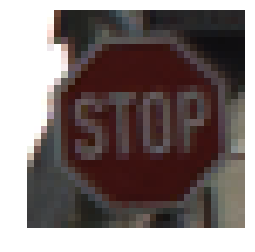

In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import cv2

def readImg(name):
    img = cv2.imread(name, -1)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.resize(RGB_img, (32, 32), interpolation = cv2.INTER_CUBIC)
    # return img

img1 = readImg('./GTSRB/Final_Test/Images/01874.ppm')
img2 = readImg('./GTSRB/Final_Test/Images/01961.ppm')
img3 = readImg('./GTSRB/Final_Test/Images/01932.ppm')
img4 = readImg('./GTSRB/Final_Test/Images/01149.ppm')
img5 = readImg('./GTSRB/Final_Test/Images/00034.ppm')

print('img1.shape: {}'.format(np.shape(img1)))

test_imgs = []
test_imgs.append(img1)
test_imgs.append(img2)
test_imgs.append(img3)
test_imgs.append(img4)
test_imgs.append(img5)

test_labels = [
    14, # 14, Stop
    20, # 20, Dangerous curve to the right
    1, # 1, Speed limit (30km/h)
    31, # 31, Wild animals crossing
    2 # 2, Speed limit (50km/h)
]

print('test_imgs.shape: {}'.format(np.shape(test_imgs)))

plt.axis('off')
plt.imshow(img2)
plt.imshow(img1)


### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./image_classification
Test Accuracy: 1.0

test_label: 14 pred_indices: [14 38  3 25  9] pred_prob: [ 0.73639745  0.11289743  0.05509889  0.04987613  0.03291505]
test_label: 20 pred_indices: [20 23 28 29 30] pred_prob: [  5.19019723e-01   4.77341026e-01   3.63767194e-03   6.36111395e-07
   4.19379546e-07]
test_label: 1 pred_indices: [1 0 6 5 8] pred_prob: [  7.89622903e-01   2.10313514e-01   4.78642323e-05   1.56133501e-05
   4.83390821e-08]
test_label: 31 pred_indices: [31 21  2 19 25] pred_prob: [  9.99999762e-01   2.35413310e-07   5.18695698e-10   3.14756082e-10
   2.11408235e-11]
test_label: 2 pred_indices: [2 1 5 3 7] pred_prob: [  1.00000000e+00   4.74342130e-08   1.93935257e-10   1.11457954e-10
   3.94449744e-16]


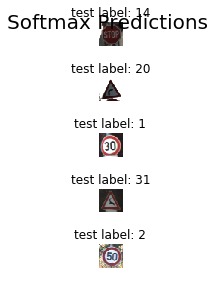

In [29]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

save_model_path = './image_classification'

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    loaded_y = loaded_graph.get_tensor_by_name('y:0')
    loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
    loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    
    # preparation 
    imgs_norm = normalize(test_imgs)
    img_label = one_hot_encode(test_labels)
    
    # Accuracy
    accuracy = sess.run(loaded_acc, feed_dict={loaded_x: imgs_norm, loaded_y:img_label, loaded_keep_prob: 1.0})
    print('Test Accuracy: {}\n'.format(accuracy))
    
    # prediction 
    top_n_predictions = 5
    predictions = sess.run(
        tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions), 
        feed_dict = {loaded_x: imgs_norm, loaded_y : img_label, loaded_keep_prob: 1.0})
    
    # plot and print   
    fig, axies = plt.subplots(nrows=5, ncols=1)
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize = 20)
    for img_i, (img, img_label, pred_indice, pred_prob) in enumerate(zip(test_imgs, test_labels, predictions.indices, predictions.values)):
        print('test_label: {} pred_indices: {} pred_prob: {}'.format(img_label, pred_indice, pred_prob))
        axies[img_i].imshow(img)
        axies[img_i].set_title('test label: {}'.format(img_label))
        axies[img_i].set_axis_off()
    
    
    

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.




### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [1]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.



NameError: name 'np' is not defined

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [30]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [32]:

save_model_path = './image_classification'

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    loaded_y = loaded_graph.get_tensor_by_name('y:0')
    loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
    loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    
    X_test_norm
    conv1 = loaded_graph.get_tensor_by_name('conv1:0')
    outputFeatureMap(X_test_norm,conv1)
    conv2 = loaded_graph.get_tensor_by_name('conv2:0')
    outputFeatureMap(X_test_norm,conv2)
    
    
    
    



INFO:tensorflow:Restoring parameters from ./image_classification


KeyError: "The name 'conv1:0' refers to a Tensor which does not exist. The operation, 'conv1', does not exist in the graph."